# Trabalhando com dados temporais<a class="anchor" id="topo"></a>
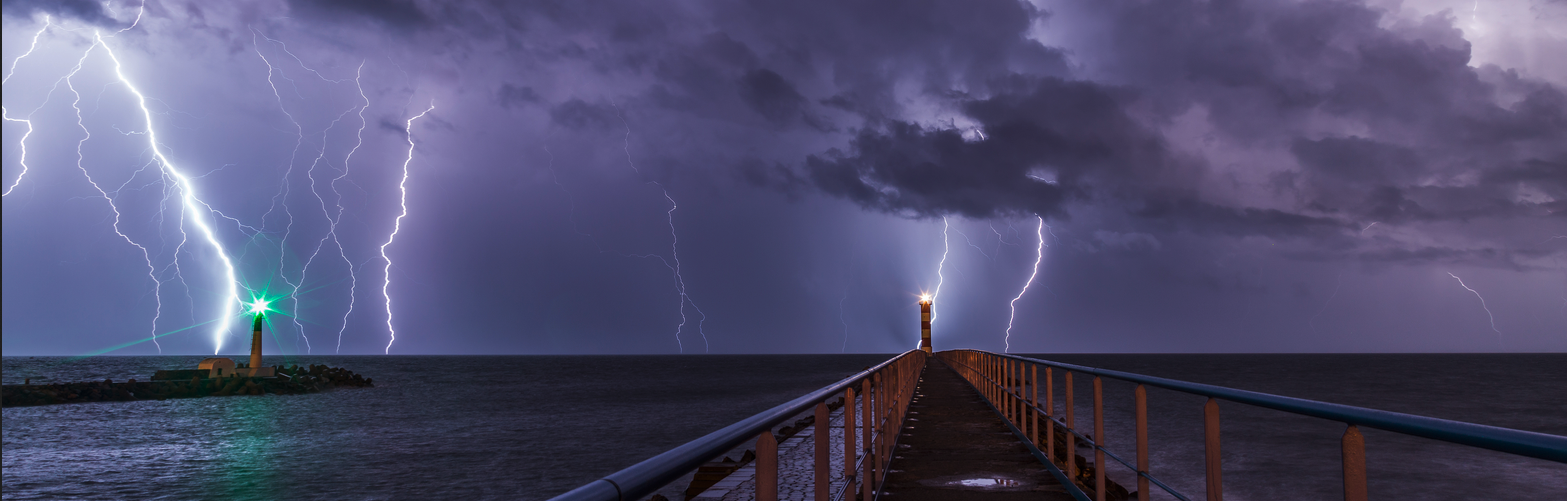
[fonte: wikimedia commons](https://upload.wikimedia.org/wikipedia/commons/c/c2/Port_and_lighthouse_overnight_storm_with_lightning_in_Port-la-Nouvelle.jpg)

------------
<div style="page-break-after: always;"></div>

<h1>Índice<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#1.-Carregando-dados-de-ativos-e-índices" data-toc-modified-id="1.-Carregando-dados-de-ativos-e-índices-1">1. Carregando dados de ativos e índices</a></span><ul class="toc-item"><li><span><a href="#1.1-Carregando-um-ativo-ou-índice" data-toc-modified-id="1.1-Carregando-um-ativo-ou-índice-1.1">1.1 Carregando um ativo ou índice<a class="anchor" id="3.1"></a></a></span></li><li><span><a href="#1.2-Carregando-diversos-conjuntos-de-dados" data-toc-modified-id="1.2-Carregando-diversos-conjuntos-de-dados-1.2">1.2 Carregando diversos conjuntos de dados<a class="anchor" id="3.2"></a></a></span></li></ul></li><li><span><a href="#2.-Gráfico-com-Plotly" data-toc-modified-id="2.-Gráfico-com-Plotly-2">2. Gráfico com Plotly<a class="anchor" id="4"></a></a></span></li><li><span><a href="#3.-Retorno-de-ações" data-toc-modified-id="3.-Retorno-de-ações-3">3. Retorno de ações<a class="anchor" id="5"></a></a></span><ul class="toc-item"><li><span><a href="#3.1-Calculando-os-retornos" data-toc-modified-id="3.1-Calculando-os-retornos-3.1">3.1 Calculando os retornos<a class="anchor" id="5.1"></a></a></span></li><li><span><a href="#3.2-Gráfico-de-retornos" data-toc-modified-id="3.2-Gráfico-de-retornos-3.2">3.2 Gráfico de retornos<a class="anchor" id="5.2"></a></a></span></li><li><span><a href="#3.3-Diferenças-" data-toc-modified-id="3.3-Diferenças--3.3">3.3 Diferenças <a class="anchor" id="5.3"></a></a></span></li></ul></li><li><span><a href="#4.-Suavizando-a-série" data-toc-modified-id="4.-Suavizando-a-série-4">4. Suavizando a série<a class="anchor" id="6"></a></a></span><ul class="toc-item"><li><span><a href="#4.1-Selecionando-um-período-maior---Downsampling" data-toc-modified-id="4.1-Selecionando-um-período-maior---Downsampling-4.1">4.1 Selecionando um período maior - <em>Downsampling</em><a class="anchor" id="6.1"></a></a></span></li><li><span><a href="#4.2-Média-móvel" data-toc-modified-id="4.2-Média-móvel-4.2">4.2 Média móvel<a class="anchor" id="6.2"></a></a></span></li></ul></li><li><span><a href="#5.-Gráfico-de-ações-candlestick" data-toc-modified-id="5.-Gráfico-de-ações-candlestick-5">5. Gráfico de ações <em>candlestick</em><a class="anchor" id="7"></a></a></span><ul class="toc-item"><li><span><a href="#5.1-Selecionando-um-único-ativo" data-toc-modified-id="5.1-Selecionando-um-único-ativo-5.1">5.1 Selecionando um único ativo<a class="anchor" id="7.1"></a></a></span></li><li><span><a href="#5.2-Construíndo-o-gráfico" data-toc-modified-id="5.2-Construíndo-o-gráfico-5.2">5.2 Construíndo o gráfico<a class="anchor" id="7.2"></a></a></span></li></ul></li><li><span><a href="#Referências" data-toc-modified-id="Referências-6">Referências</a></span></li></ul></div>

> "O tempo é o mais sábio de todos os conselheiros."  
Pericles, estadista grego.   

Nesta aula vamos explorar aspectos de dados em séries temporais, alguns tratamentos bem comuns e uma exploração gráfica desse tipo de dado utilizando o Plotly, que é um dos pacotes gráficos baseados em web mais populares.

Exemplos de dados de tempo utilizados em ciência de dados são:

- COVID-19
    - Quantidade de casos
    - Fatalidades
    - Pessoas vacinadas
    - Leitos ocupados
- Em empresas
    - Quantidade de vendas
    - Solicitações
    - Clientes
    - Casos de fraude
- Em finanças
    - Preço do dolar
    - Valor de ações
    - Índice (inflação, Ibovespa etc)


Vamos baixar dados de valores de ações e indicadores brasileiros pelo Yahoo Finance, tratá-los e visualizá-los.

**Os nossos objetivos são:**

- Ser capaz de baixar dados do Yahoo Finance
- Ampliar o contato com dados de séries de tempo
- Aprender o básico sobre o Plotly


**Antes de começar:**  
Vamos precisar do ```pandas-datareader``` e do ```Plotly```. Se você não tem esses dois instalados, instale agora!

>```pip install pandas-datareader```  
>```pip install plotly```


ou pelo Anaconda:

>```conda install pandas-datareader```  
> ```conda install plotly plotly```


[Instalação do Plotly](https://dash.plotly.com/installation)  
[Instalação do pandas-datareader](https://pandas-datareader.readthedocs.io/en/latest/)


------------
<div style="page-break-after: always;"></div>

## 1. Carregando dados de ativos e índices
[Voltar ao topo](#topo)

A melhor forma gratuita de se obter dados de ativos financeiros é através do Yahoo Finance. O pacote ```pandas_datareader``` faz isso com facilidade. É um projeto imenso e de tem inúmeros outros recursos para baixar dados com eficiência - vale consultar a [documentação](https://pandas-datareader.readthedocs.io/en/latest/). 

In [1]:
from pandas_datareader import data as web
import yfinance as yfin

import plotly.express as px
from plotly import graph_objects

import pandas as pd
import numpy as np

### 1.1 Carregando um ativo ou índice<a class="anchor" id="3.1"></a>
[Voltar ao topo](#topo)

Vamos utilizar a função ```DataReader()``` do pacote ```pandas_datareader```. Essa função já está preparada para estabelecer contato com algumas fontes e solicitar conjuntos de dados. Vamos nos conectar ao Yahoo Finance, e solicitar dados de ações ou de índices. Cada uma dessas coisas estão armazenados em um conjunto de dados. Índices no Yahoo Finance estão em conjuntos de dados cujo nome começa com um circunflexo (```^```) como o IBOVESPA (```^BVSP```) e ações **brasileiras** o nome termina com ```.SA``` como ```PETR4.SA```.

Parâmetros:

- **name** - um string com o nome do conjunto de dados - um ativo ou índice no nosso caso
- **data_source** - o nome da fonte dos dados
- **start** - a data inicial da solicitação
- **end** - a data final da solicitação (se vazio, faz um *slicing* até a data mais recente)

In [2]:
%%time

yfin.pdr_override()
ativos = '^BVSP'
dt_ini, dt_fim = '2021-01-01', '2021-07-01'

yf = web.get_data_yahoo(ativos, 
                        dt_ini, 
                        dt_fim)


yf

[*********************100%%**********************]  1 of 1 completed
CPU times: total: 453 ms
Wall time: 1.39 s


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-01-04,119024.0,120354.0,118062.0,118558.0,118558.0,8741400
2021-01-05,118835.0,119790.0,116756.0,119223.0,119223.0,9257100
2021-01-06,119377.0,120924.0,118917.0,119851.0,119851.0,11638200
2021-01-07,119103.0,121983.0,119101.0,121956.0,121956.0,11774800
2021-01-08,122387.0,125324.0,122386.0,125077.0,125077.0,11085800
...,...,...,...,...,...,...
2021-06-24,128433.0,129541.0,128428.0,129514.0,129514.0,7237000
2021-06-25,129513.0,129748.0,126697.0,127256.0,127256.0,9363800
2021-06-28,127255.0,128067.0,126629.0,127429.0,127429.0,8155600


### 1.2 Carregando diversos conjuntos de dados<a class="anchor" id="3.2"></a>
[Voltar ao topo](#topo)  
Podemos também usar a função ```get_data_yahoo```, que faz o mesmo, mas não precisamos mais indicar a fonte. 

Se não indicarmos a data de fim, a função traz os dados até a data mais recente.

No caso do Yahoo Finance, podemos colocar um alista de nomes no parâmetro *name*. Vamos testar com algumas das principais ações brasileiras. Olha como fica:

In [3]:
%%time
ativos = ['^BVSP', 'ITUB3.SA', 'PETR4.SA', 'ABEV3.SA', 'VALE3.SA']
dt_ini = '2016-01-01'

yf = web.get_data_yahoo(ativos, start=dt_ini)
yf.head()

[*********************100%%**********************]  5 of 5 completed
CPU times: total: 812 ms
Wall time: 2.11 s


Adj Close                                             Close  \
             ABEV3.SA  ITUB3.SA  PETR4.SA  VALE3.SA    ^BVSP   ABEV3.SA   
Date                                                                      
2016-01-04  13.508917  9.468317  2.435921  7.997639  42141.0  17.209999   
2016-01-05  13.720853  9.669163  2.368552  7.890501  42419.0  17.480000   
2016-01-06  13.587413  9.611778  2.269272  7.310687  41773.0  17.309999   
2016-01-07  13.226336  9.497010  2.219632  6.875829  40695.0  16.850000   
2016-01-08  13.399027  9.644569  2.223177  6.642642  40612.0  17.070000   

                                                  ...       Open             \
             ITUB3.SA PETR4.SA VALE3.SA    ^BVSP  ...   ABEV3.SA   ITUB3.SA   
Date                                              ...                         
2016-01-04  14.000000     6.87    12.69  42141.0  ...  17.730000  14.769696   
2016-01-05  14.296969     6.68    12.52  42419.0  ...  17.250000  14.212121   
2016-01-06  14.212121     6.40    11.60  41773.0  ...  17.360001  14.236363   
2016-01-07  14.042424     6.26    10.91  40695.0  ...  17.170000  14.036363   
2016-01-08  14.260606     6.27    10.54  40612.0  ...  16.930000  14.175757   

                                         Volume                              \
           PETR4.SA VALE3.SA    ^BVSP  ABEV3.SA ITUB3.SA  PETR4.SA VALE3.SA   
Date                                                                          
2016-01-04     6.57    12.49  43349.0  13206900   278520  45962100  4587900   
2016-01-05     6.92    12.67  42139.0  10774200    99825  29446700  2693500   
2016-01-06     6.53    12.08  42410.0   7739100   181995  67507200  6758900   
2016-01-07     6.19    11.26  41772.0  15316400   221925  57387900  6450400   
2016-01-08     6.38    11.07  40695.0  10684000   122100  52100300  4429400   

                       
                ^BVSP  
Date                   
2016-01-04  2976300.0  
2016-01-05  2557200.0  
2016-01-06  3935900.0  
2016-01-07  4032300.0  
2016-01-08  3221600.0  

[5 rows x 30 columns]

In [4]:
yf['Adj Close'].isna().sum()

ABEV3.SA    0
ITUB3.SA    0
PETR4.SA    0
VALE3.SA    0
^BVSP       8
dtype: int64

**Coluna multi index**

O dataframe obtido vem com índice hierárquico nas colunas. Cada uma das quantidades padrão que são obtidas do Yahoo Finance (Adj Close 	Close 	High 	Low 	Open 	Volume) são os nomes do primeiro nível do índice de colunas, os nomes dos ativos são o segundo nível.

Isso significa que se selecionarmos um nome do primeiro nível como ```Adj Close```, selecionamos o valor de fechamento ajustado (no caso) para todos os ativos.

In [5]:
yf.columns

MultiIndex([('Adj Close', 'ABEV3.SA'),
            ('Adj Close', 'ITUB3.SA'),
            ('Adj Close', 'PETR4.SA'),
            ('Adj Close', 'VALE3.SA'),
            ('Adj Close',    '^BVSP'),
            (    'Close', 'ABEV3.SA'),
            (    'Close', 'ITUB3.SA'),
            (    'Close', 'PETR4.SA'),
            (    'Close', 'VALE3.SA'),
            (    'Close',    '^BVSP'),
            (     'High', 'ABEV3.SA'),
            (     'High', 'ITUB3.SA'),
            (     'High', 'PETR4.SA'),
            (     'High', 'VALE3.SA'),
            (     'High',    '^BVSP'),
            (      'Low', 'ABEV3.SA'),
            (      'Low', 'ITUB3.SA'),
            (      'Low', 'PETR4.SA'),
            (      'Low', 'VALE3.SA'),
            (      'Low',    '^BVSP'),
            (     'Open', 'ABEV3.SA'),
            (     'Open', 'ITUB3.SA'),
            (     'Open', 'PETR4.SA'),
            (     'Open', 'VALE3.SA'),
            (     'Open',    '^BVSP'),
            (   'Volume',

In [6]:
fechamento = yf['Adj Close']
fechamento.head()

,ABEV3.SA,ITUB3.SA,PETR4.SA,VALE3.SA,^BVSP
Date,,,,,
2016-01-04,13.508917,9.468317,2.435921,7.997639,42141.0
2016-01-05,13.720853,9.669163,2.368552,7.890501,42419.0
2016-01-06,13.587413,9.611778,2.269272,7.310687,41773.0
2016-01-07,13.226336,9.497010,2.219632,6.875829,40695.0
2016-01-08,13.399027,9.644569,2.223177,6.642642,40612.0


Podemos ainda usar o ```.stack()``` para empilhar os dados e montar o nosso gráfico. Observe como os valores ficam em uma única coluna, com o nome do ativo e a data indicados em duas outras colunas.

In [7]:
fechamento_vertical = yf['Adj Close'].stack().reset_index()
fechamento_vertical.columns = ['data', 'ativo', 'valor']

fechamento_vertical

,data,ativo,valor
0,2016-01-04,ABEV3.SA,13.508917
1,2016-01-04,ITUB3.SA,9.468317
2,2016-01-04,PETR4.SA,2.435921
3,2016-01-04,VALE3.SA,7.997639
4,2016-01-04,^BVSP,42141.000000
...,...,...,...
9677,2023-10-11,ABEV3.SA,13.290000
9678,2023-10-11,ITUB3.SA,23.709999
9679,2023-10-11,PETR4.SA,35.119999
9680,2023-10-11,VALE3.SA,67.360001


------------
<div style="page-break-after: always;"></div>

## 2. Gráfico com Plotly<a class="anchor" id="4"></a>
[Voltar ao topo](#topo)

O Plotly é um dos pacotes gráficos mais populares entre usuários de Python e de outras plataformas, pois também tem interfaces para R, Julia e outras linguagens.

É um pacote gráfico *open source* baseado em browsers, que fornece gráficos que podem ser visualizados nos Jupyter Notebooks, além de integrar bem com o *streamlit* e aplicações web em geral.

Produz gráficos 'bonitinhos' no seu padrão, e traz elementos interessantes de interatividade com o cursor do mouse.

No exemplo abaixo, vamos fazer uma linha para cada ativo com os dados coletados do Yahoo Finance. São muitos ativos, já esperamos ter um gráfico poluído e difícil de visualizar. Mas vamos explorar esse gráfico pela interatividade natural do Plotly.

Para templates do plotly [clique aqui](https://plotly.com/python/templates/)  
Para visualizar uma galeria do plotly [clique aqui](https://plotly.com/python/)


In [8]:
fechamento_vertical.head(15)

,data,ativo,valor
0,2016-01-04,ABEV3.SA,13.508917
1,2016-01-04,ITUB3.SA,9.468317
2,2016-01-04,PETR4.SA,2.435921
3,2016-01-04,VALE3.SA,7.997639
4,2016-01-04,^BVSP,42141.000000
5,2016-01-05,ABEV3.SA,13.720853
6,2016-01-05,ITUB3.SA,9.669163
7,2016-01-05,PETR4.SA,2.368552
8,2016-01-05,VALE3.SA,7.890501
9,2016-01-05,^BVSP,42419.000000


In [9]:
fig = px.line(fechamento_vertical, x="data", y="valor", color='ativo', template='plotly_white')
fig.show()

------------
<div style="page-break-after: always;"></div>

## 3. Retorno de ações<a class="anchor" id="5"></a>
[Voltar ao topo](#topo)

O retorno é o ganho (ou perda) percentual que uma pessoa obtém se comprar uma ação em um momento $t_0$ e vendera mesma ação por um outro valor em um momento $t_1$. Dá pra entender por que é tão popular.

Por exemplo:

> Se você compra uma ação por 100 reais, e vende ela por 110, ela te dá de retorno 10%, que é:  
> $(110-100)/100 = 10\%$

Sendo $P_t$ o *preço* de um ativo no tempo *t*, o **retorno** do ativo entre os tempos $t_0$ e $t_1$ pode ser calculado assim:

$$ R_{t_1} = \frac{P_{t_1} - P_{t_0}}{P_{t_0}} = \frac{\Delta P}{P_{t_0}}$$

In [10]:
P0 = 100
P1 = 95

Retorno = (P1 - P0) / P0
Retorno

-0.05

### 3.1 Calculando os retornos<a class="anchor" id="5.1"></a>
[Voltar ao topo](#topo)

O Pandas possui um método para calcular os retornos $R_t$ de uma série que é o ```.pct_change()```, que está definido tanto para *series* quanto para *data frames*.

In [11]:
# Base original
yf['Adj Close'].head()

,ABEV3.SA,ITUB3.SA,PETR4.SA,VALE3.SA,^BVSP
Date,,,,,
2016-01-04,13.508917,9.468317,2.435921,7.997639,42141.0
2016-01-05,13.720853,9.669163,2.368552,7.890501,42419.0
2016-01-06,13.587413,9.611778,2.269272,7.310687,41773.0
2016-01-07,13.226336,9.497010,2.219632,6.875829,40695.0
2016-01-08,13.399027,9.644569,2.223177,6.642642,40612.0


In [12]:
# Cálculo de 1 retorno "na mão"
p1 = 42141
p2 = 42419

R = (p2-p1)/p1
R

0.0065969008803777795

Observe que esse método funciona para *Series* e para *Data Frames* do Pandas.

In [24]:
yf_retornos = yf['Adj Close'].pct_change()
yf_retornos.head()

,ABEV3.SA,ITUB3.SA,PETR4.SA,VALE3.SA,^BVSP
Date,,,,,
2016-01-04,NaN,NaN,NaN,NaN,NaN
2016-01-05,0.015689,0.021212,-0.027657,-0.013396,0.006597
2016-01-06,-0.009725,-0.005935,-0.041916,-0.073483,-0.015229
2016-01-07,-0.026574,-0.011940,-0.021875,-0.059483,-0.025806
2016-01-08,0.013057,0.015537,0.001597,-0.033914,-0.002040


### 3.2 Gráfico de retornos<a class="anchor" id="5.2"></a>
[Voltar ao topo](#topo)

Vamos montar o gráfico de retornos exatamente como o gráfico de valores dos ativos. Lembrando que são retornos diários, então o que melhor poderemos identificar são momentos de maior variação (volatilidade).

In [26]:
yf_retornos_vertical = yf_retornos.stack().reset_index()
yf_retornos_vertical.columns = ['data', 'ativo', 'valor']
yf_retornos_vertical

,data,ativo,valor
0,2016-01-05,ABEV3.SA,0.015689
1,2016-01-05,ITUB3.SA,0.021212
2,2016-01-05,PETR4.SA,-0.027657
3,2016-01-05,VALE3.SA,-0.013396
4,2016-01-05,^BVSP,0.006597
...,...,...,...
9680,2023-10-11,ABEV3.SA,0.003019
9681,2023-10-11,ITUB3.SA,0.008078
9682,2023-10-11,PETR4.SA,-0.002556
9683,2023-10-11,VALE3.SA,0.008685


In [27]:
fig = px.line(yf_retornos_vertical, x="data", y="valor", color='ativo', template='plotly_white')
fig.show()

### 3.3 Diferenças <a class="anchor" id="5.3"></a>
[Voltar ao topo](#topo)

>"Há uma relação estreita entre o salário de pastores presbiterianos de Massachusetts e o preço do rum em Havana."  
Extraído de "Como mentir com estatísticas" de Darrell Huff

Tendência é um fenômeno bastante comum em diversos dados de séries de tempo. A logo prazo, o preço de qualquer coisa é comum que aumente, devido a inflação - o que provavelmente explica a afirmativa do livro do Darrell Huff. Se pegarmos quaisquer dois valores, a longo prazo, somente a inflação já explica o fato de estarem correlacionados, resultando que frequentemente essa correlação não tem qualquer utilidade prática (muito menos pode ser interpretada como causa-efeito).

Os retornos são comparações relativas entre o valor em dois momentos diferentes, que tendem a resolver essa questão da tendência.

De forma bem semelhante, podemos tomar as diferenças de forma simples na série em dois tempos distintos. Este procedimento resolve, na maioria dos casos, os problemas de tendência e de correlação espúria.

No pandas, objetos tipo *series* e *data frames* têm um método que faz isso que é o ```diff()```. Como a maioria dos métodos do Pandas, ele tem diversos recursos que controlam o seu funcionamento (selecionando o número de períodos e o eixo por exemplo) - vale a pena dar uma olhada na [documentação](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.diff.html).

In [16]:
diff = yf['Adj Close'].\
    diff()

In [17]:
yf['Adj Close'].corr()

,ABEV3.SA,ITUB3.SA,PETR4.SA,VALE3.SA,^BVSP
ABEV3.SA,1.000000,0.174050,-0.149102,-0.208481,-0.080889
ITUB3.SA,0.174050,1.000000,0.450828,0.489581,0.800118
PETR4.SA,-0.149102,0.450828,1.000000,0.717211,0.705691
VALE3.SA,-0.208481,0.489581,0.717211,1.000000,0.868932
^BVSP,-0.080889,0.800118,0.705691,0.868932,1.000000


In [29]:
diff.corr()

,ABEV3.SA,ITUB3.SA,PETR4.SA,VALE3.SA,^BVSP
ABEV3.SA,1.000000,0.455845,0.274563,0.139117,0.557661
ITUB3.SA,0.455845,1.000000,0.398509,0.246076,0.738713
PETR4.SA,0.274563,0.398509,1.000000,0.305450,0.637762
VALE3.SA,0.139117,0.246076,0.305450,1.000000,0.520885
^BVSP,0.557661,0.738713,0.637762,0.520885,1.000000


In [19]:
# Scatterplot PETR4 vs ^BVSP
ac = yf['Adj Close'].copy()
ac['ano'] = ac.reset_index().Date.dt.year.astype('str').values

fig = px.scatter(ac, x = '^BVSP', y='PETR4.SA', color = 'ano', marginal_y="box",
                marginal_x = "violin", trendline="ols", template = "simple_white")
fig.show()

In [20]:
# Scatterplot das diferenças PETR4 vs ^BVSP

yf_dif = yf['Adj Close'].copy().diff()
yf_dif['ano'] = yf.reset_index().Date.dt.year.astype('str').values

fig = px.scatter(yf_dif, x = '^BVSP', y='PETR4.SA', color = 'ano', marginal_y="box",
                marginal_x = "violin", trendline="ols", template = "simple_white")
fig.show()

**Volumes de transações por ativo por ano**

In [21]:
# Volumes
# Empilhar > Data, Ativo, Ano
# Calcular o ano
# Sumarizar ano/Ativo
# Pizza

yf_volume = yf['Volume']
yf_volume_vertical = yf_volume.stack().reset_index()
yf_volume_vertical.columns = ['data', 'ativo', 'valor']
yf_volume_vertical.head()

,data,ativo,valor
0,2016-01-04,ABEV3.SA,13206900.0
1,2016-01-04,ITUB3.SA,278520.0
2,2016-01-04,PETR4.SA,45962100.0
3,2016-01-04,VALE3.SA,4587900.0
4,2016-01-04,^BVSP,2976300.0


In [22]:
yf_volume_vertical.head()
yf_volume_vertical['ano'] = yf_volume_vertical.data.dt.year.values

yf_agrupado = yf_volume_vertical.groupby(['ano', 'ativo']).sum().reset_index()

yf_agrupado.head(7)

TypeError: datetime64 type does not support sum operations

In [ ]:
fig = px.sunburst(yf_agrupado, path=['ativo', 'ano'], values='valor')
fig.show()

In [ ]:
df = px.data.gapminder().query("year == 2007")
fig = px.sunburst(df, path=['continent', 'country'], values='pop',
                  color='lifeExp', hover_data=['iso_alpha'])
fig.show()


------------
<div style="page-break-after: always;"></div>

## 4. Suavizando a série<a class="anchor" id="6"></a>
[Voltar ao topo](#topo)
De uma forma semelhante ao ```.resampling()```, temos um método prático no Pandas para calcularmos funções dentro de janelas móveis, o método ```.rolling()```.

Duas formas populares de se suavizar uma série são:

- Média móvel: consiste na média dos dados ao longo de uma janela móvel de tamanho fixo, digamos de tamanho 3.
- Suavização exponencial: o método mais conhecido de suavização exponencial é o chamado *ewma* (*exponentially weighted moving average*). Um tipo de média móvel em que se dá mais peso para as observações recentes e peso sequencialmente menor para as observações mais antigas.

### 4.1 Selecionando um período maior - *Downsampling*<a class="anchor" id="6.1"></a>
[Voltar ao topo](#topo)

Se queremos o retorno mensal de uma ação por exemplo, mas temos os valores diários, basta considerarmos apenas os valores de "fechamento de mês" e calcular os retornos normalmente - isto é chamado de ***downsampling***, pois estamos reduzindo a quantidade de dados disponível.

O método ```.resample()``` faz um agrupamento bem semelhante ao ```.groupby()```. Quando indicamos que agrupe a série por um período mais amplo que o original (ex: agrupar mensalmente uma série diária), fazemos um *downsampling*. 

Vamos usar os seguintes parâmetros dessa função:
- rule: é um *[offset string](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#timeseries-offset-aliases)* indicando o agrupamento (ex: 'W' para semana ou 'M' para mês),
- closed: indica se o intervalo é fechado à direita ou à esquerda,
- label: indica onde fica o rótulo do agrupamento

O funcionamento dos parâmetros ```closed``` e ```label``` está ilustrado na figura abaixo para uma série diária, agrupada semanalmente:

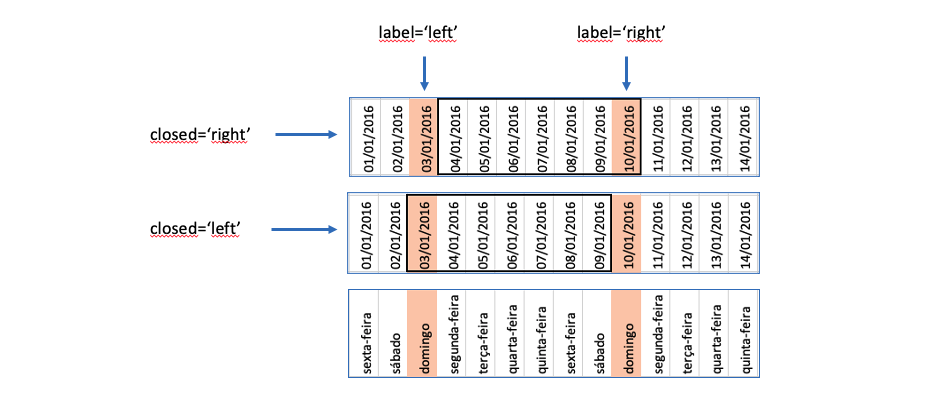

In [ ]:
# Construindo uma Series simples
datas = pd.date_range('01/01/2016', periods=14, freq='D')
ts = pd.Series(list(range(7))*2, index=datas)
ts

In [ ]:
# O método ffill retorna o valor de "fechamento" do período
ts.resample('W', closed='right', label='left').ffill()

In [ ]:
# Podemos também encadear outros métodos como .max() e .mean()
ts.resample('W', closed='right', label='left').mean()

### 4.2 Média móvel<a class="anchor" id="6.2"></a>
[Voltar ao topo](#topo)

Média móvel é um popular método de suavização de séries temporais. Consiste em sumarizar os dados de uma janela móvel de tamanho fixo através da média, como ilustrado na figura abaixo:

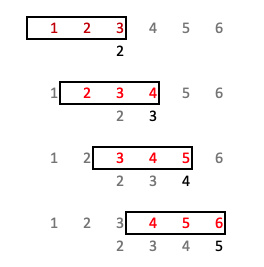

Como ilustrado, dada a série [1, 2, 3, 4, 5, 6], sua média móvel de tamanho 3 é a série [NaN, Nan, 2, 3, 4, 5].

In [ ]:
# vamos ver na nossa série simplificada
ts.rolling(3).mean()

In [ ]:
# e agora na base do yahoo finance com tamanho = 360
yf_retornos_ma360 = yf_retornos.rolling(360).mean()
yf_retornos_ma360_vertical = yf_retornos_ma360.stack().reset_index()
yf_retornos_ma360_vertical.columns = ['data', 'ativo', 'valor']

In [ ]:
fig = px.line(yf_retornos_ma360_vertical, x="data", y="valor", color='ativo')
fig.show()

------------
<div style="page-break-after: always;"></div>

## 5. Gráfico de ações *candlestick*<a class="anchor" id="7"></a>
[Voltar ao topo](#topo)

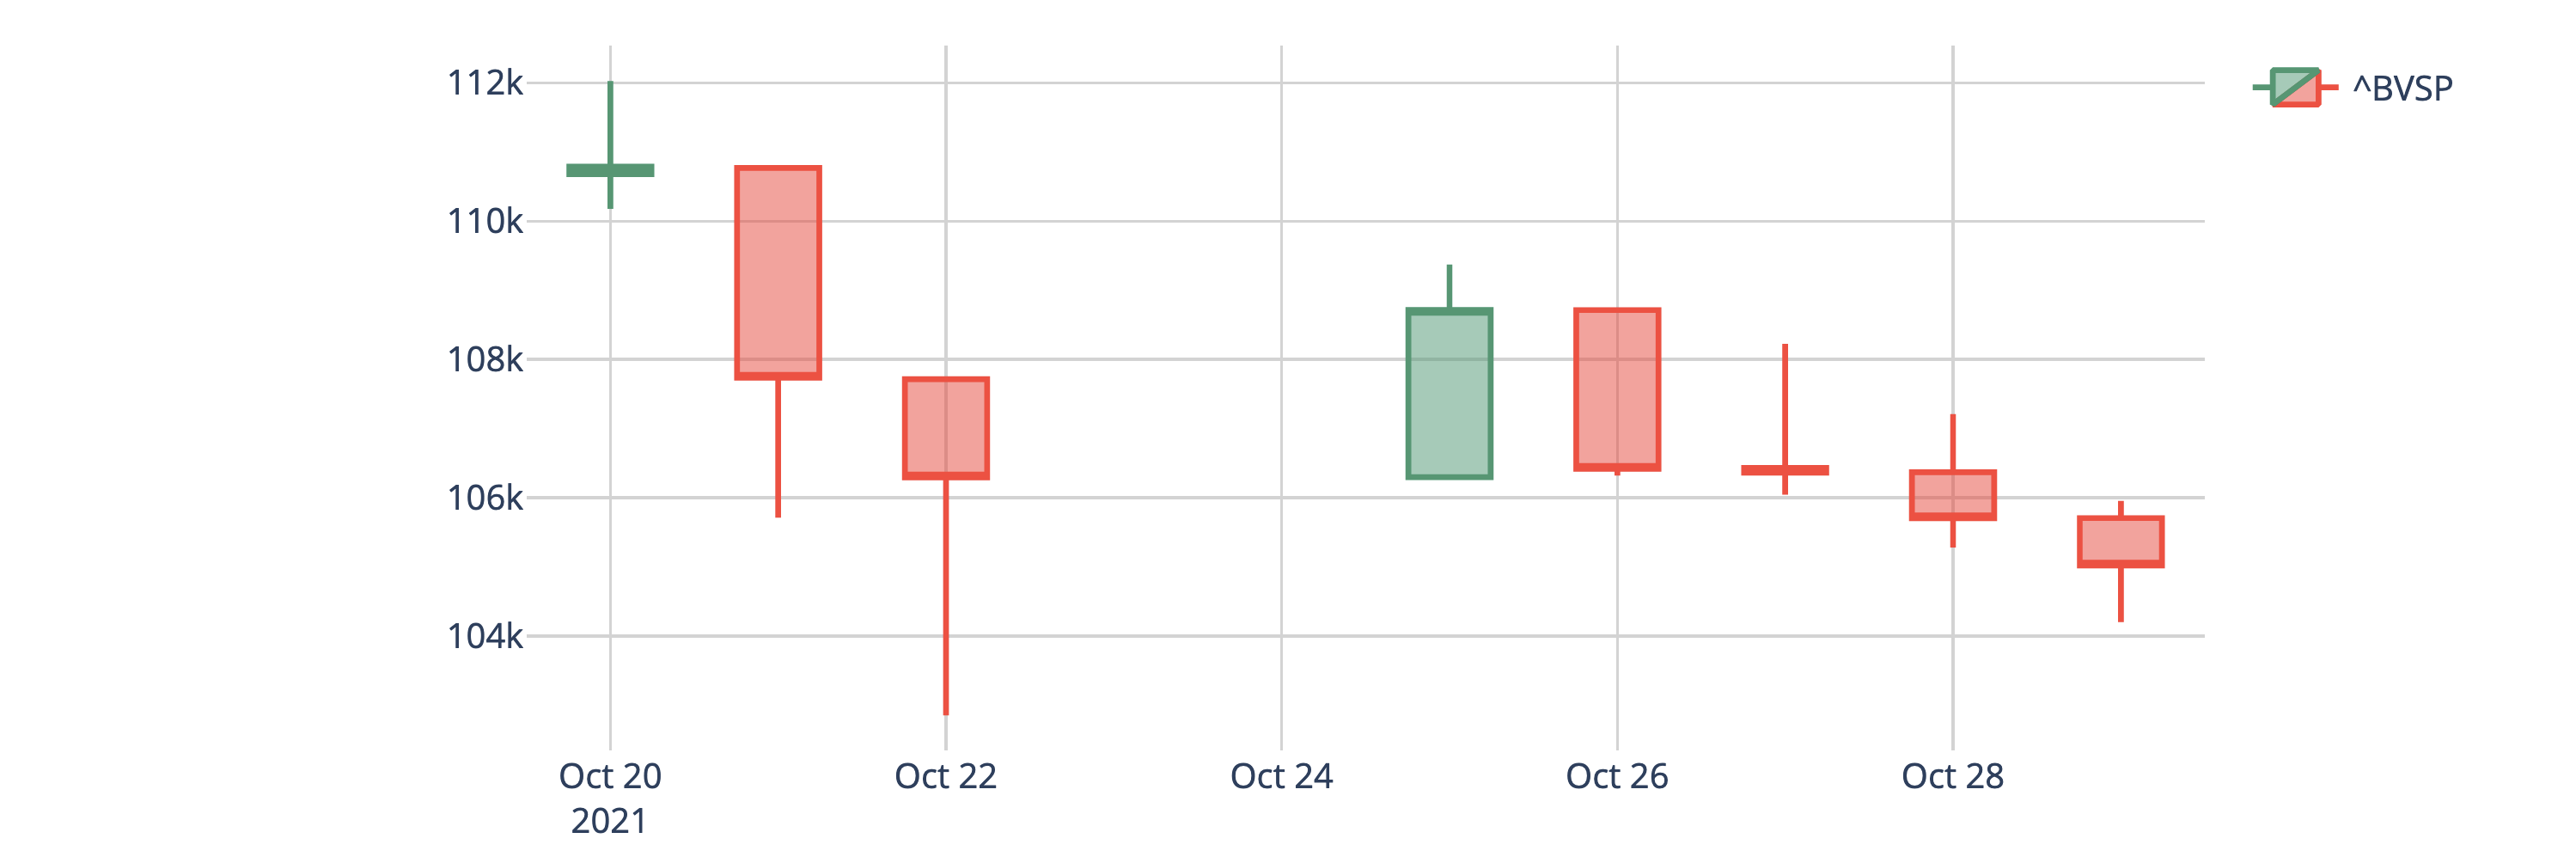

O Plotly também possui um tipo de gráfico especial para mostrar variações de ativos dentro de períodos. É um gráfico bastante comum para esse fim. 

- A cor da caixinha indica se o dia foi de queda ou de elevação do ativo
- A caixa indica os valores de abertura e fechamento
- As linhas finas indicam os valores mínimo e máximo do dia

### 5.1 Selecionando um único ativo<a class="anchor" id="7.1"></a>
[Voltar ao topo](#topo)

Prieiramente vamos selecionar apenas um valor dos que baixamos, por exemplo o índice bovespa.

Lembrando que o dataframe possui um índice hierárquico para as colunas, vamos precisar selecioná-las através de uma lista de tuplas.

In [ ]:
yf.columns

Vamos criar uma lista de tuplas correspondente às colunas do indicador ```^BVSP``` com a função ```zip()```.

In [ ]:
lista_indicadores = ['Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume']
ativo = ['^BVSP']*len(lista_indicadores)

In [ ]:
colunas = list(zip(lista_indicadores, ativo))

Agora vamos selecionar os dados somente do índice Ibovespa. Vamos aproveitar também e selecionar um período menor, utilizando o *slicing* de data no *index* do nosso objeto.

In [ ]:
bvsp = yf.loc['09/20/2021':,colunas]
bvsp.columns = lista_indicadores

In [ ]:
bvsp.head()

### 5.2 Construíndo o gráfico<a class="anchor" id="7.2"></a>
[Voltar ao topo](#topo)

A função que faz o *candlestick* é a ```graph_objects.Figure```. Ela não está no plotly express, então vamos precisar importá-la.

Vamos passar diversos parâmetros ao mesmo tempo para a função que constrói o gráfico através de um único objeto do tipo dicionário. O dicionário deve conter todos os parâmetros da função, que são:

- x: o valor que deve entrar no eixo x
- open: o valor de abertura do ativo
- close: o valor de fechamento do ativo
- high: o valor máximo
- low: o valor mínimo
- type: o tipo de gráfico que vai ser um *candlestick*
- name: o nome do ativo que vai aparecer na legenda
- showlegend: um parâmetro estético que define se deve ou não mostrar a legenda

In [ ]:
graph = {
    'x': bvsp.index,
    'open': bvsp.Open,
    'close': bvsp.Close,
    'high': bvsp.High,
    'low': bvsp.Low,
    'type': 'candlestick',
    'name': '^BVSP',
    'showlegend': True
}

Agora a construção do gráfico utilizando a função ```graph_objects``` do plotly.

In [ ]:
from plotly import graph_objects
from plotly.graph_objs import Layout

layout = Layout(
    paper_bgcolor='rgba(0,0,0,0)',
    plot_bgcolor='rgba(0,0,0,0)'
)

grafico = graph_objects.Figure(
    data = [graph],
    layout_title="Índice Bovespa",
    layout=layout
)
grafico.update_xaxes(showgrid=True, gridwidth=1, gridcolor='LightGrey')
grafico.update_yaxes(showgrid=True, gridwidth=1, gridcolor='LightGrey')

grafico

## Referências

- Sites
    - [Yahoo finance](https://finance.yahoo.com/)  
    - [Pandas-datareader]([documentação](https://pandas-datareader.readthedocs.io/en/latest/).)  
    - [Templates do Plotly](https://plotly.com/python/templates/)  
    - [Galeria do Plotly](https://plotly.com/python/)  
- Livros
    - "Python para análise de dados" Wes McKinney, ed. Oreilly, 2019 - Capítulo 6  
    - "Storytelling com Dados" Cole Nussbaumer Knaflic, Alta books, 2019  